In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

import pymc as pm
import bambi as bmb
import arviz as az

Per questi esercizi, useremo i dati tratti da [O'Connell, et al. (2021)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0244974). Reduced social distancing during the COVID-19 pandemic is associated with antisocial behaviors in an online United States sample. PLoS ONE.

Questo studio ha valutato se i comportamenti di distanziamento sociale (all'inizio della pandemia di COVID-19) fossero associati a comportamenti antisociali auto-riferiti. Per misurare un indice del comportamento di distanziamento sociale, ai partecipanti è stata presentata un'immagine di una sagoma di adulto circondata da un bordo rettangolare. È stato chiesto loro di cliccare su un punto nell'immagine che rappresentasse a che distanza solitamente si trovavano dalle altre persone.

Qui è presente una *heatmap* che mostra a che distanza i partecipanti hanno riportato di stare dalle altre persone nell'ultima settimana, con un colore marrone scuro che indica una maggiore densità di risposte. La coordinata della risposta media, indicata con un +, rappresenta una distanza di circa 98 pollici (2.5 metri).

![Figura 1](https://journals.plos.org/plosone/article/figure/image?download&size=medium&id=info:doi/10.1371/journal.pone.0244974.g001)

Leggiamo i dati riportati dagli autori. 

In [2]:
df = pd.read_csv("../data/stab.csv")

VSCode tronca l'output stampato sullo schermo. Per elencare tutte le colonne uso la funzione `to_string` che però si applica solo ai DataFrame.

In [3]:
cols = df.columns

mydf = pd.DataFrame()
mydf["cols"] = cols
print(mydf["cols"].to_string()) 

0                                 subID
1                          mturk_randID
2                     suspect_itaysisso
3                               Country
4                                Region
5                                   ISP
6                                loc_US
7                             loc_state
8                           loc_zipcode
9                            loc_County
10                   loc_2010population
11                       loc_Land_Sq_Mi
12                  loc_Density_Sq_Mile
13         loc_Covid_Cases_april_1_2020
14                                attn1
15                                attn2
16                                attn3
17                            StartDate
18                              EndDate
19                             Duration
20                           worry_self
21                          likely_self
22                          health_self
23                      likely_lovedone
24                      health_lovedone


## Report 1

**a** 
Trovare il numero di righe e di colonne del DataFrame.

In [4]:
df.shape

(131, 126)

(a) Selezionare le colonne "silhouette_dist_X_min81", rinominandola come "distance", "STAB_total", rinominandola come "stab", e "times_left_house_pastweek", rinominandola come "times_left_house". Calcolare il numero di elementi in ciascuno di questi vettori. (b) Utilizzando un ciclo for o una list comprehension, individuare gli indici delle righe in cui la variabile "distance" presenta un valore mancante. (c) Scrivere una funzione che accetti una lista come input e restituisca il conteggio di valori NaN presenti nella lista, fornendo commenti per ciascun passaggio del codice. Sfruttare la proprietà degli NaN secondo cui non sono uguali a se stessi. 

In [5]:
value = np.nan
print(value)

nan


In [6]:
value == value

False

Testare la funzione sulle liste "distance", "stab" e "times_left_house". (d) Creare una lista di 10 elementi contenente 5 numeri, 2 stringhe e 3 valori NaN. Testare la funzione creata su questa lista. (e) Creare un DataFrame con le variabili "distance", "stab" e "times_left_house". Filtrare il DataFrame in modo da escludere dati mancanti. (f) Utilizzando Seaborn, creare un istogramma con KDE sovrapposto per le variabili "times_left_house" e "stab". Interpretare i grafici. (g) Aggiungere al DataFrame la variabile "is_high_stab", che assume valore 1 se "stab" è minore o uguale a 80 e 0 altrimenti. Generare due violin-plot, uno per ciascuna modalità di "is_high_stab", per la variabile "times_left_house". Commentare i risultati. (h) Calcolare la media, la moda, la deviazione standard e la Deviazione Assoluta dalla Media (MAD) per i due gruppi.

In [7]:
distance = df["silhouette_dist_X_min81"]
stab = df["STAB_total"]
times_left_house = df["times_left_house_pastweek"]

In [8]:
len(distance)

131

In [9]:
len(stab)


131

**b**

In [10]:
nan_indices = [i for i in range(len(distance)) if np.isnan(distance[i])]
print(f"Observations with NaN values: {nan_indices}")

Observations with NaN values: [17, 22, 24, 25, 39, 51, 60, 67, 71, 94]


**c**

In [11]:
def count_nans(data_list):
    """Count the number of NaNs in a list

    Args:
        data_list (list): A list that contains the observations
    
    Returns:
        int: The number of NaNs found in the list
    """
    nan_count = 0
    
    for value in data_list:
        if value != value:  
            nan_count += 1
        
    return nan_count

In [12]:
count_nans(distance)

10

In [53]:
count_nans(stab)

0

In [91]:
count_nans(times_left_house)

0

**d**

In [13]:
new_list = [1, np.nan, 2, 3, np.nan, 4, 5, np.nan, "qualcosa", "qualcosa d'altro"]
print(new_list)

[1, nan, 2, 3, nan, 4, 5, nan, 'qualcosa', "qualcosa d'altro"]


In [14]:
count_nans(new_list)

3

**e**

In [15]:
new_df = pd.DataFrame()
new_df["distance"] = distance
new_df["stab"] = stab
new_df["times_left_house"] = times_left_house
new_df["subID"] = df["subID"]

new_df.head()

,distance,stab,times_left_house,subID
0,441.0,51,3,1001
1,287.0,94,5,1002
2,313.0,95,4,1003
3,452.0,45,2,1004
4,297.0,37,0,1005


In [148]:
new_df.shape

(131, 4)

In [20]:
df_cleaned = new_df.dropna()
df_cleaned.shape

(121, 4)

**f**

<Axes: xlabel='times_left_house', ylabel='Count'>

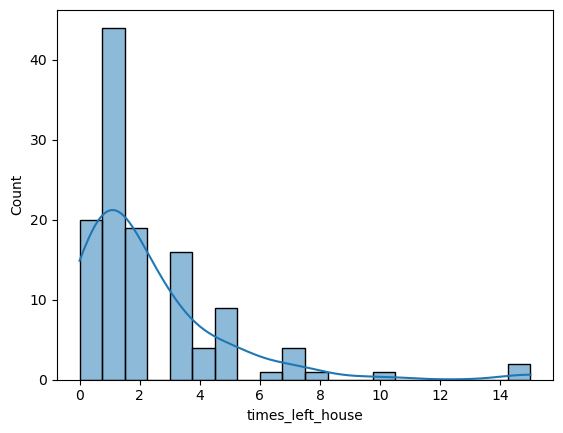

In [21]:
sns.histplot(data=df_cleaned, x='times_left_house', bins=20, kde=True)


<Axes: xlabel='stab', ylabel='Count'>

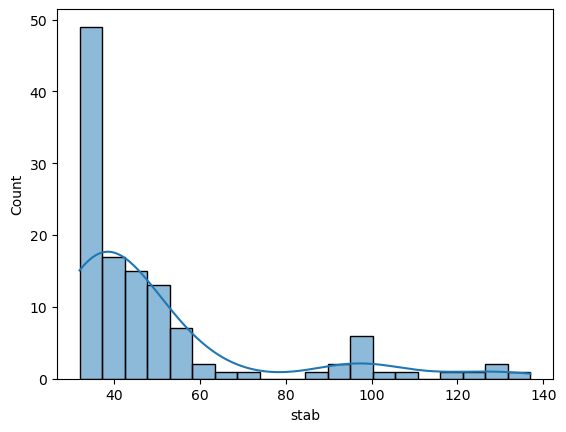

In [22]:
sns.histplot(data=df_cleaned, x='stab', bins=20, kde=True)


**g**

In [23]:
df_cleaned["is_high_stab"] = np.where(df_cleaned["stab"] > 80, 1, 0)

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_62926/631635115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["is_high_stab"] = np.where(df_cleaned["stab"] > 80, 1, 0)


<Axes: xlabel='is_high_stab', ylabel='times_left_house'>

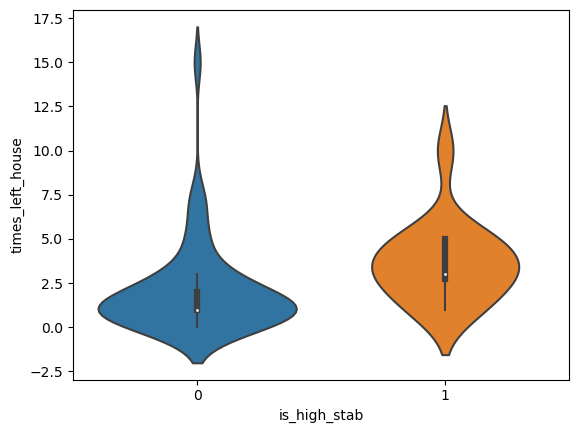

In [24]:
sns.violinplot(x="is_high_stab", y="times_left_house", data=df_cleaned)

**h**

In [25]:
grouped = df_cleaned.groupby("is_high_stab")["times_left_house"]
summary_stats = grouped.agg(median=np.median, mean=np.mean, mad=sm.robust.scale.mad, std=np.std)
print("Summary statistics per group:\n", summary_stats)

Summary statistics per group:
               median      mean       mad       std
is_high_stab                                      
0                1.0  2.047619  1.482602  2.547174
1                3.0  3.625000  2.223903  2.217356


## Report 2

Nel contesto di un modello di regressione lineare generalizzato (GLM) con famiglia di distribuzione lognormale, i parametri stimati avranno un significato specifico. Poiché la distribuzione lognormale è una distribuzione continua positiva, è importante considerare come interpretare i coefficienti stimati e come riportarli sulla scala naturale dei dati.

In un modello GLM con famiglia lognormale, la variabile di risposta Y è trasformata applicando il logaritmo naturale (ln) prima di eseguire la regressione. 

In [26]:
y1 = df_cleaned[df_cleaned["is_high_stab"] == 1]["times_left_house"]
y0 = df_cleaned[df_cleaned["is_high_stab"] == 0]["times_left_house"]

In [27]:
model = bmb.Model(
    "times_left_house ~ is_high_stab", df_cleaned, family="negativebinomial"
)

In [28]:
fitted = model.fit(
    draws=2000,
    idata_kwargs={"log_likelihood": True},
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [times_left_house_alpha, Intercept, is_high_stab]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.


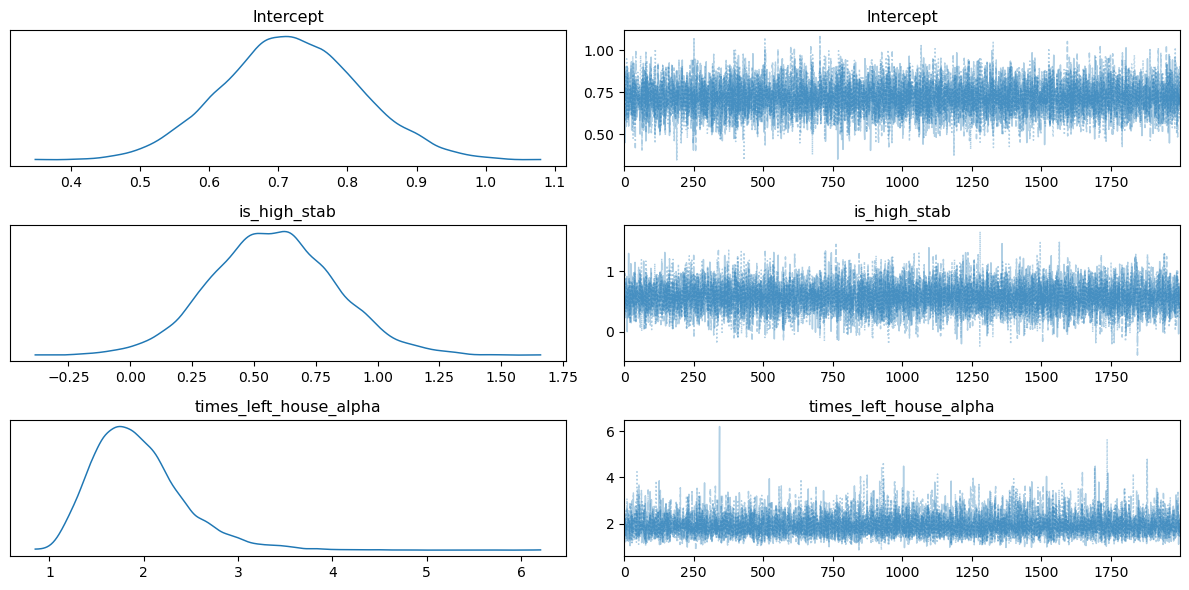

In [29]:
az.plot_trace(fitted, combined=True)
plt.tight_layout()

In [30]:
az.summary(fitted)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.718,0.100,0.534,0.907,0.001,0.001,10206.0,5894.0,1.0
is_high_stab,0.577,0.248,0.109,1.039,0.002,0.002,11795.0,5964.0,1.0
times_left_house_alpha,1.943,0.488,1.138,2.843,0.005,0.004,11020.0,6359.0,1.0


L'intercetta denota il logaritmo naturale del tasso di eventi (intensità) previsto quando tutte le variabili esplicative sono poste a zero. Per comprenderne l'effetto sulla scala naturale, è necessario eseguire l'esponenziazione del valore stimato dell'intercetta. Nel contesto attuale, questo valore corrisponde al numero stimato di occasioni in cui l'individuo ha lasciato la propria abitazione nella settimana precedente, qualora appartenga al gruppo caratterizzato da valori bassi di STAB (Antisocial Behavior Score).

In [31]:
np.exp(0.715)

2.0441866822585566

Nel contesto di un modello negative binomial, i coefficienti stimati per le variabili esplicative rappresentano la variazione percentuale prevista nel tasso di eventi in risposta a un aumento unitario nella variabile indipendente, mantenendo costanti le altre variabili. Questi coefficienti vengono interpretati sulla scala logaritmica. Per comprendere l'effetto delle variabili esplicative sulla scala naturale, è essenziale calcolare l'esponenziale del coefficiente stesso. Nel caso dei dati in esame, la pendenza indica la differenza nel valore medio di Y (la variabile di risposta) tra i due gruppi: in altre parole, essa rappresenta di quante volte in più (considerando il segno positivo) il gruppo con valori elevati di STAB lascia la propria abitazione nella settimana precedente rispetto al gruppo con valori bassi di STAB.

In [32]:
np.exp(0.715 + 0.580)

3.6509959741412716

Poiché l'intervallo di credibilità del parametro "is_high_stab" non include lo 0, possiamo affermare con un livello di confidenza soggettiva del 94% che gli individui con valori STAB alti hanno lasciato la propria abitazione un numero di volte superiore nella settimana precedente rispetto agli individui con valori STAB bassi.

Esaminiamo la distribuzione predittiva a posteriori.

In [33]:
posterior_predictive = model.predict(fitted, kind="pps")
fitted

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

<Axes: xlabel='times_left_house / times_left_house'>

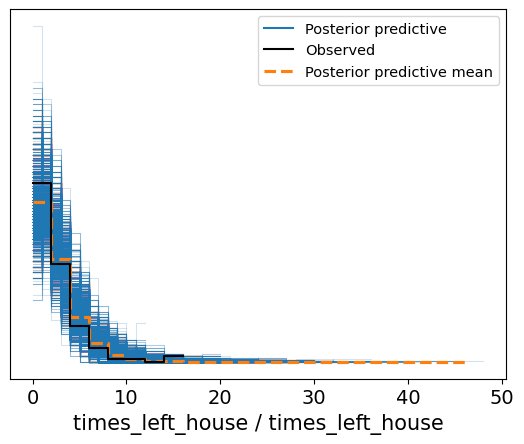

In [34]:
az.plot_ppc(fitted)

Il PP-Check indica che il modello è adeguato per i dati presenti.